<a href="https://colab.research.google.com/github/yunixi/python-kaggle-house-prices/blob/main/house-prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 수집

1) train.csv 파일 읽기

2) 전체 데이터 중 내 담당인 칼럼들만 수집하기

In [ ]:
import pandas as pd
import numpy as np

houseData = pd.read_csv("/content/train.csv")

In [ ]:
houseData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#데이터 전처리로 부여한 12개의 칼럼에 대해서 별도의 DataFrame을 myColumn에 생성
myColumn = houseData[['2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath','KitchenQual','TotRmsAbvGrd','Functional', 'KitchenAbvGr', 'BedroomAbvGr']]

#KitchenAbvGr → Kitchen, BedroomAbvGr → Bedroom
myColumn.rename(columns = {'KitchenAbvGr':'Kitchen', 'BedroomAbvGr':'Bedroom'}, inplace=True)

myColumn.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Kitchen,Bedroom
0,854,0,1710,1,0,2,1,Gd,8,Typ,1,3
1,0,0,1262,0,1,2,0,TA,6,Typ,1,3
2,866,0,1786,1,0,2,1,Gd,6,Typ,1,3
3,756,0,1717,1,0,1,0,Gd,7,Typ,1,3
4,1053,0,2198,1,0,2,1,Gd,9,Typ,1,4


# 2. 데이터 전처리

## 2-1 데이터 중간값, 평균값, 분산값 등 확인


In [ ]:
#myColumn에 대해서 중간값, 평균값, 분산값 구하기

#평균값
print(myColumn.mean())

#분산값
print(myColumn.var())

#중간값
print(myColumn.median())

2ndFlrSF         346.992466
LowQualFinSF       5.844521
GrLivArea       1515.463699
BsmtFullBath       0.425342
BsmtHalfBath       0.057534
FullBath           1.565068
HalfBath           0.382877
TotRmsAbvGrd       6.517808
Kitchen            1.046575
Bedroom            2.866438
dtype: float64
2ndFlrSF        190557.075337
LowQualFinSF      2364.204048
GrLivArea       276129.633363
BsmtFullBath         0.269268
BsmtHalfBath         0.057003
FullBath             0.303508
HalfBath             0.252894
TotRmsAbvGrd         2.641903
Kitchen              0.048549
Bedroom              0.665494
dtype: float64
2ndFlrSF           0.0
LowQualFinSF       0.0
GrLivArea       1464.0
BsmtFullBath       0.0
BsmtHalfBath       0.0
FullBath           2.0
HalfBath           0.0
TotRmsAbvGrd       6.0
Kitchen            1.0
Bedroom            3.0
dtype: float64


In [ ]:
myColumn.mode()

,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Kitchen,Bedroom
0,0,0,864,0,0,2,0,TA,6,Typ,1,3


In [ ]:
#간단하게 확인하는 방법
myColumn.describe()

,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Kitchen,Bedroom
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,6.517808,1.046575,2.866438
std,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,1.625393,0.220338,0.815778
min,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,2.000000
50%,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,3.000000
75%,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,7.000000,1.000000,3.000000
max,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,8.000000


### 참고) WoodDeckSF 데이터 추가로 확인해보기

In [ ]:
fieldWood = houseData[['WoodDeckSF']]
fieldWood.describe()

,WoodDeckSF
count,1460.000000
mean,94.244521
std,125.338794
min,0.000000
25%,0.000000
50%,0.000000
75%,168.000000
max,857.000000


In [ ]:
fieldWood['WoodDeckSF'].value_counts(normalize=True)

0      0.521233
192    0.026027
100    0.024658
144    0.022603
120    0.021233
         ...   
269    0.000685
265    0.000685
263    0.000685
260    0.000685
215    0.000685
Name: WoodDeckSF, Length: 274, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fe5060150>]],
      dtype=object)

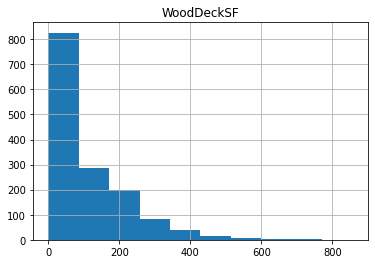

In [ ]:
fieldWood.hist()

## 시각화로 데이터 확인하기(Histogram)

In [ ]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fe5003110>,
      dtype=object)

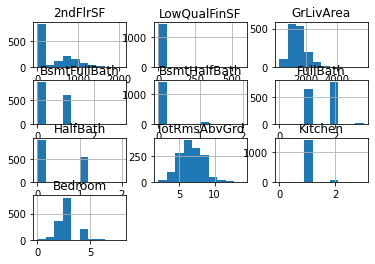

In [ ]:
#전체 칼럼들에 대해서 histogram으로 나타내기
myColumn.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fe4bc2190>]],
      dtype=object)

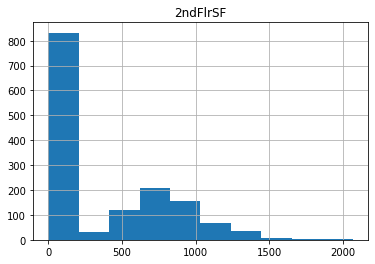

In [ ]:
#특정 칼럼을 histogram으로 나타내기
myColumn.hist(column='2ndFlrSF')

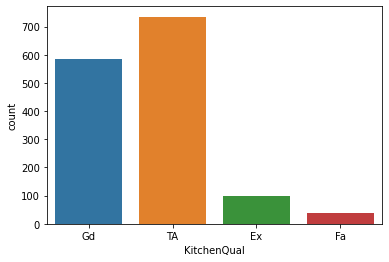

In [ ]:
import seaborn as sns

sns.countplot(x = myColumn['KitchenQual'])

In [ ]:
myColumn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   2ndFlrSF      1460 non-null   int64 
 1   LowQualFinSF  1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   BsmtFullBath  1460 non-null   int64 
 4   BsmtHalfBath  1460 non-null   int64 
 5   FullBath      1460 non-null   int64 
 6   HalfBath      1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   TotRmsAbvGrd  1460 non-null   int64 
 9   Functional    1460 non-null   object
 10  Kitchen       1460 non-null   int64 
 11  Bedroom       1460 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 137.0+ KB


# 이상치 탐지 방법

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc

data = myColumn['LowQualFinSF']

## 1. Z-score 방식으로 이상치 탐지
Z-score = standard-score
 - 가우스 분포가 취하고 있다는 가정으로 관측치가 평균에서 벗어난 표준 편차의 수
 - 참고 URL : https://claryk.tistory.com/5


```
Z score = ( x - mean ) / std.deviation
```
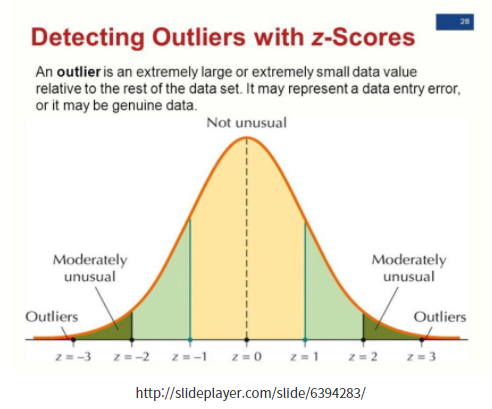



In [ ]:
mean = np.mean(data)
std = np.std(data)
print('평균 : ', mean, ' / 표준편차 : ', std, sep = '\n')

평균 : 
5.844520547945206
 / 표준편차 : 
48.60642684099989


In [ ]:
#Z-score 계산하기
threshold = 3
outlier = []

for i in data:
  z = (i-mean) / std
  if z> threshold:
    outlier.append(i)

print('이상치 : ', outlier)

이상치 :  [360, 513, 234, 528, 572, 392, 371, 390, 420, 473, 156, 515, 360, 232, 481, 514, 397, 479, 205, 384]


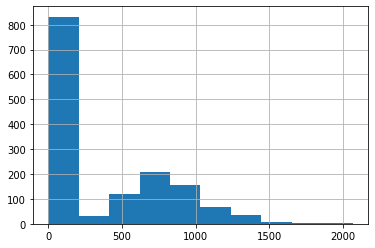

In [ ]:
data.hist()

##2. IQR(Interquartile range) 방식
- 대표적 이상치 탐지 방법 중 하나
- IQR : (Q3 - Q1) 사분위수 상위 75% 지점의 값과 하위 25% 지점의 값 차이
- 참고 URL : https://claryk.tistory.com/4

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    

In [ ]:
data = houseData[['2ndFlrSF']]
outlier_iqr(data, '2ndFlrSF')

IQR은 728.0 이다.
lower bound 값은 -1092.0 이다.
upper bound 값은 1820.0 이다.
총 이상치 개수는 2 이다.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


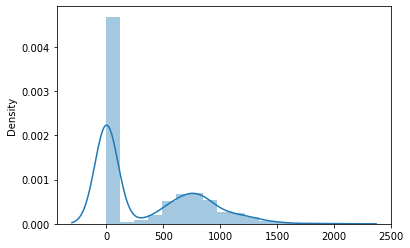

In [ ]:
sns.distplot(data, kde=True, rug=False)
plt.show()

테스트


In [ ]:
testData = houseData[['BsmtFinSF1']]
testData.isna().sum()

BsmtFinSF1    0
dtype: int64

시각화 참고 URL : https://dining-developer.tistory.com/30

# 이상치 처리 방법

In [ ]:
mean = np.mean(myColumn['2ndFlrSF'])
std = np.std(myColumn['2ndFlrSF'])
average = int(np.mean(myColumn['2ndFlrSF']))
print(np.mean(myColumn['2ndFlrSF']))
threshold = 3

def test(x):
  if (x - mean) / std > threshold:
    print(x)
    return 5
  else : return x

342.76849315068495


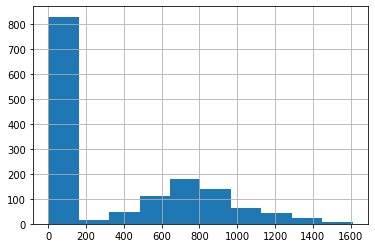

In [ ]:
data1 = myColumn['2ndFlrSF']
data1.hist()

In [ ]:
data2 = myColumn[['2ndFlrSF']]
data2.head()


,2ndFlrSF
0,854
1,0
2,866
3,756
4,1053


In [ ]:
def zscoreOutlier(df, col, z):
  return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [ ]:
def test(df, col, z):
  return df[(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [ ]:
data2.loc[test(data2, '2ndFlrSF', 3)]

,2ndFlrSF


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7851c41a10>]],
      dtype=object)

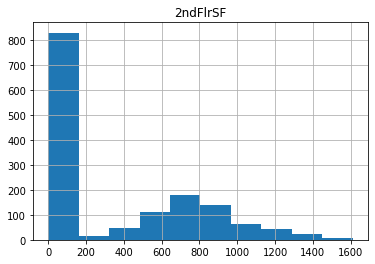

In [ ]:
data2.hist()

In [ ]:

myColumn['2ndFlrSF'] = myColumn['2ndFlrSF'].apply(test)

testColumn = myColumn[['2ndFlrSF']]
testColumn['2ndFlrSF'] = myColumn['2ndFlrSF'].apply(test)

t = testColumn.loc[testColumn['2ndFlrSF']==5]

t.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,2ndFlrSF


다시해보자ㅠ


In [ ]:
column = myColumn[['LowQualFinSF']]
column_order = column.sort_values(by=['LowQualFinSF'], ascending=False)

column_order.head(10)

,LowQualFinSF
185,572
170,528
635,515
1009,514
88,513
883,481
1173,479
406,473
267,420
1031,397


In [ ]:
def getOutlierByZscore(x):
  z = (x - mean) / std
  if z > 3:
    return True;

def getOutlierByZscore2(df, col, z):
  return df[(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [ ]:
testData = column_order['LowQualFinSF']
s = getOutlierByZscore(testData.item)

TypeError: ignored

In [ ]:
column_order['LowQualFinSF'] = column_order.apply(
    lambda x: x['LowQualFinSF'])

IndexError: ignored

In [ ]:
column_order.loc[column_order['LowQualFinSF'] > (column_order['LowQualFinSF'] - 1) ] = 999
column_order.head(10)

,LowQualFinSF
185,999
170,999
635,999
1009,999
88,999
883,999
1173,999
406,999
267,999
1031,999
